In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_excel("Superstore.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df.drop_duplicates(inplace=True)
df["Order Year"]=df["Order Date"].dt.year
df["Order Month"]=df["Order Date"].dt.month
df["Order Day"]=df["Order Date"].dt.day
df["Order Weekday"]=df["Order Date"].dt.weekday+1
df["Order Year Month"]=df["Order Date"].dt.strftime("%Y-%m")
df["Ship Days"]=(df["Ship Date"]-df["Order Date"]).dt.days

df["Cost"]=df["Sales"]-df["Profit"]
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Weekday,Order Year Month,Ship Days,Cost
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,2,2016-11,3,220.0464
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,2,2016-11,3,512.3580
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,7,2016-06,4,7.7486
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,7,2015-10,7,1340.6085
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,7,2015-10,7,19.8516


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID            9994 non-null   int64         
 1   Order ID          9994 non-null   object        
 2   Order Date        9994 non-null   datetime64[ns]
 3   Ship Date         9994 non-null   datetime64[ns]
 4   Ship Mode         9994 non-null   object        
 5   Customer ID       9994 non-null   object        
 6   Customer Name     9994 non-null   object        
 7   Segment           9994 non-null   object        
 8   Country           9994 non-null   object        
 9   City              9994 non-null   object        
 10  State             9994 non-null   object        
 11  Postal Code       9994 non-null   int64         
 12  Region            9994 non-null   object        
 13  Product ID        9994 non-null   object        
 14  Category          9994 n

In [5]:
print("The most recent order date is:",df["Order Date"].max())
print("The first order date is:",df["Order Date"].min())

The most recent order date is: 2017-12-30 00:00:00
The first order date is: 2014-01-03 00:00:00


In [6]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Weekday,Ship Days,Cost
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,15.468481,4.206324,3.958175,201.201105
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,1.000000,1.000000,0.000000,0.554400
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,8.000000,2.000000,3.000000,12.688200
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,15.000000,5.000000,4.000000,41.664000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,23.000000,6.000000,5.000000,182.226300
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,31.000000,7.000000,7.000000,24449.558400
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,8.748327,2.122925,1.747567,550.839414


In [7]:
df.describe(include="object")

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Order Year Month
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850,48
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,2017-12
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48,462


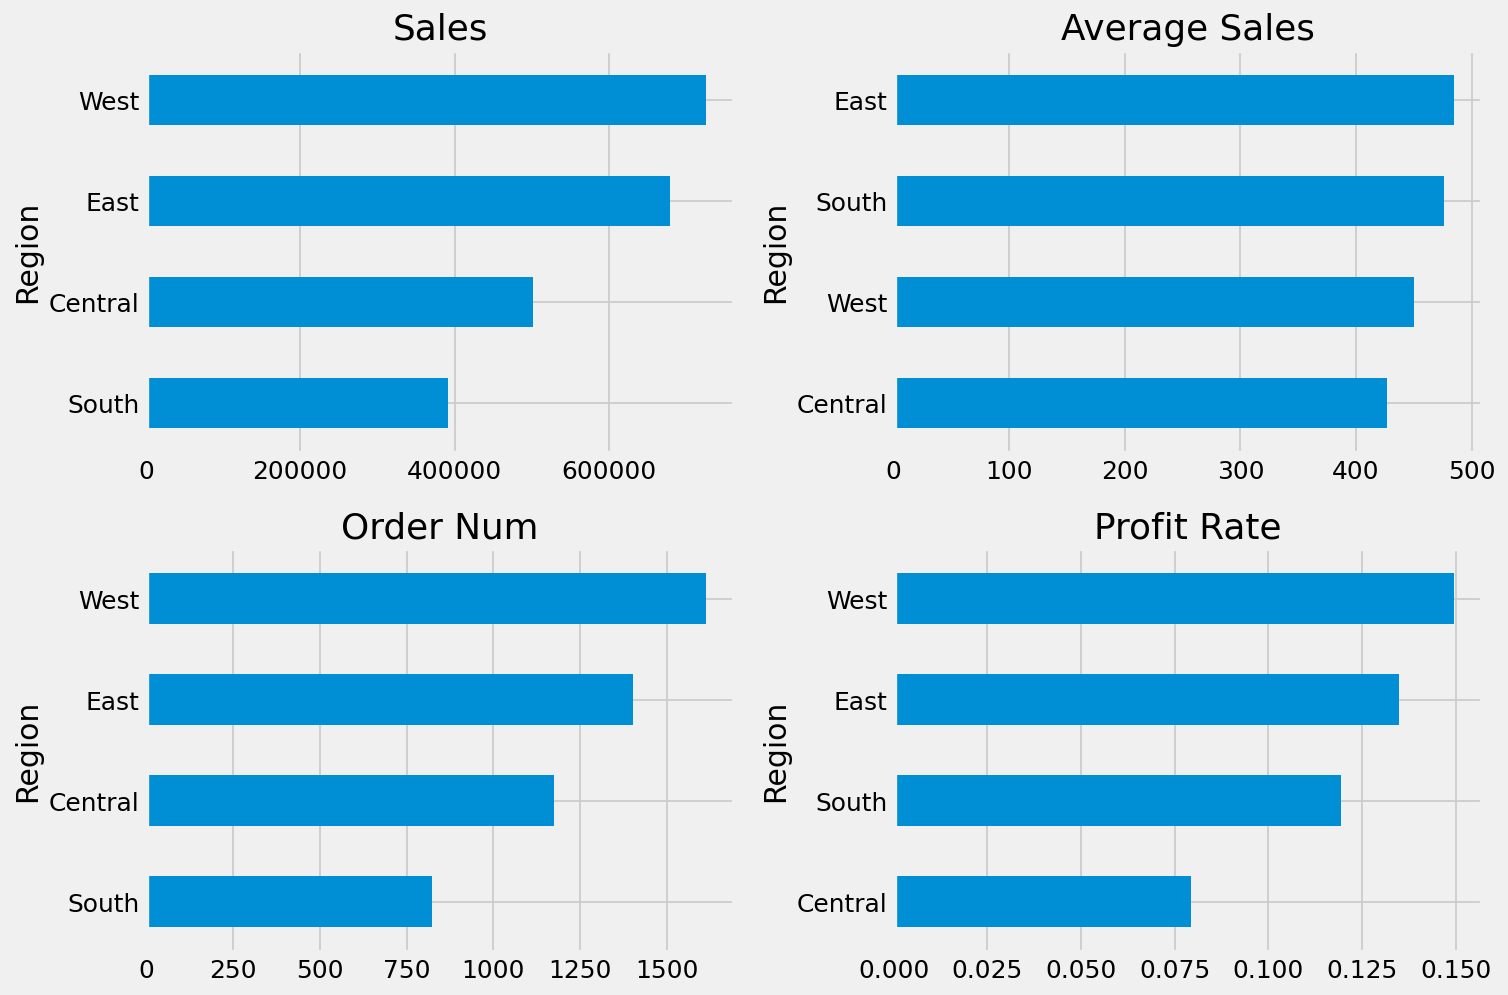

In [8]:
df_region = df.groupby("Region").agg({"Sales":"sum","Order ID":"nunique","Profit":"sum"})
df_region["Average Sales"] = df_region["Sales"]/df_region["Order ID"]
df_region["Profit Rate"] = df_region["Profit"]/df_region["Sales"]
df_region.rename(columns={"Order ID":"Order Num"}, inplace=True)

fig,ax = plt.subplots(dpi=128,figsize=(12,8))
for i, col in enumerate(["Sales","Average Sales","Order Num","Profit Rate"],1):
    plt.subplot(2,2,i)
    df_region[col].sort_values().plot(kind="barh")
    plt.title(col)
plt.tight_layout()
plt.show()

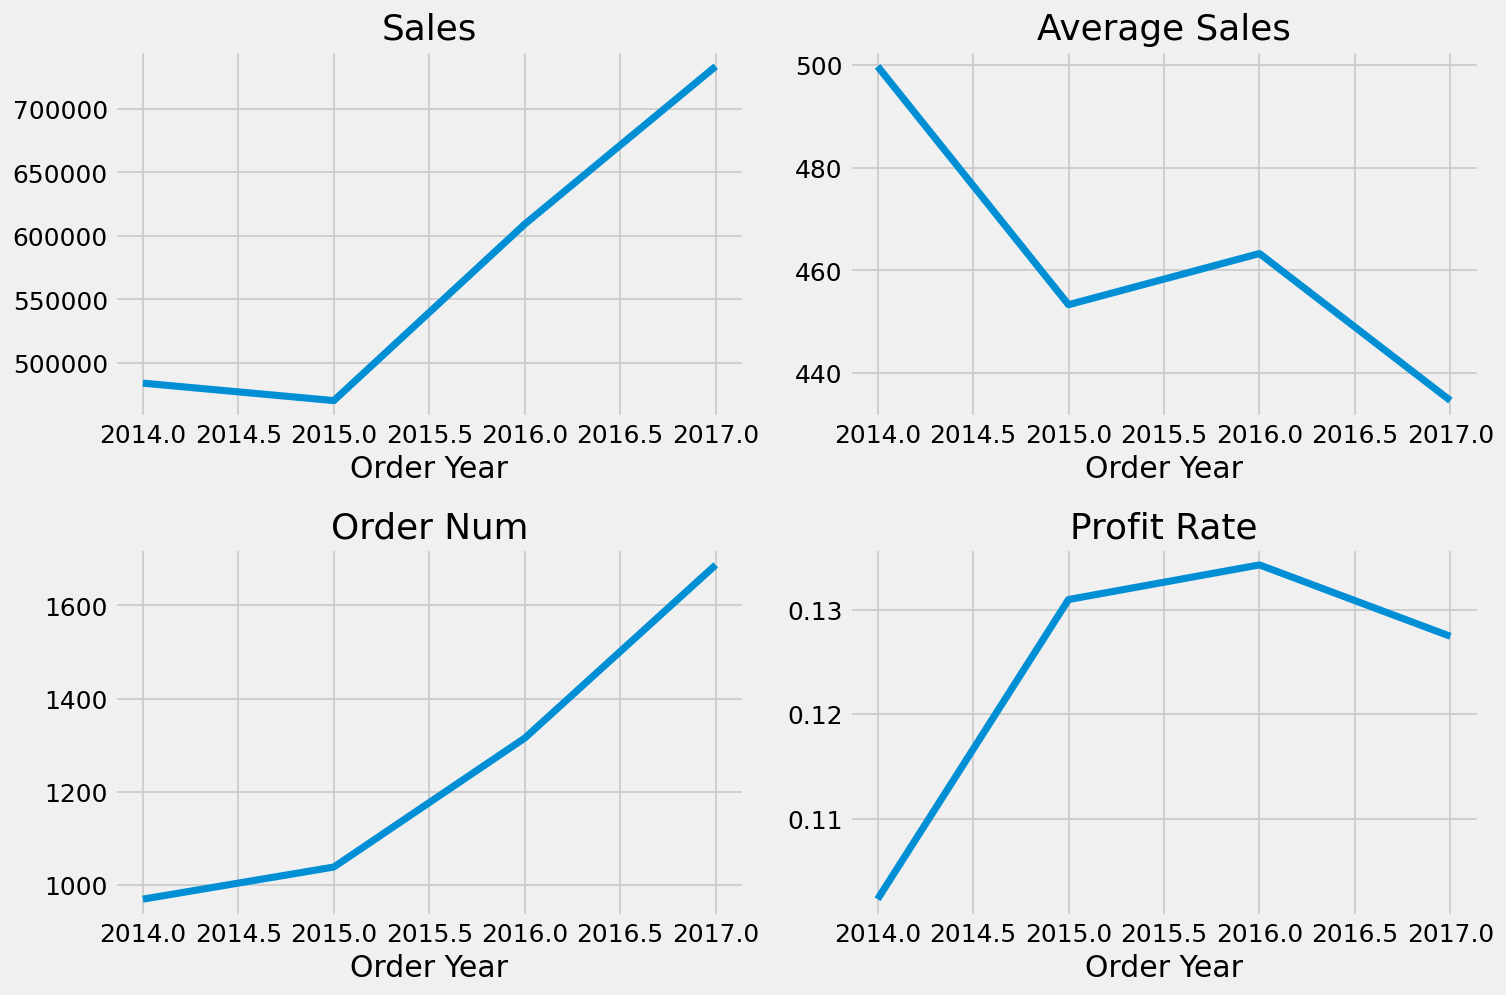

In [9]:
df_year = df.groupby("Order Year").agg({"Sales":"sum","Order ID":"nunique","Profit":"sum"})
df_year["Average Sales"] = df_year["Sales"]/df_year["Order ID"]
df_year["Profit Rate"] = df_year["Profit"]/df_year["Sales"]
df_year.rename(columns={"Order ID":"Order Num"}, inplace=True)

fig,ax = plt.subplots(dpi=128,figsize=(12,8))
for i, col in enumerate(["Sales","Average Sales","Order Num","Profit Rate"],1):
    plt.subplot(2,2,i)
    df_year[col].plot(kind="line")
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
df_year

,Sales,Order Num,Profit,Average Sales,Profit Rate
Order Year,,,,,
2014,484247.4981,969,49543.9741,499.739420,0.102311
2015,470532.5090,1038,61618.6037,453.306849,0.130955
2016,609205.5980,1315,81795.1743,463.274219,0.134265
2017,733215.2552,1687,93439.2696,434.626707,0.127438


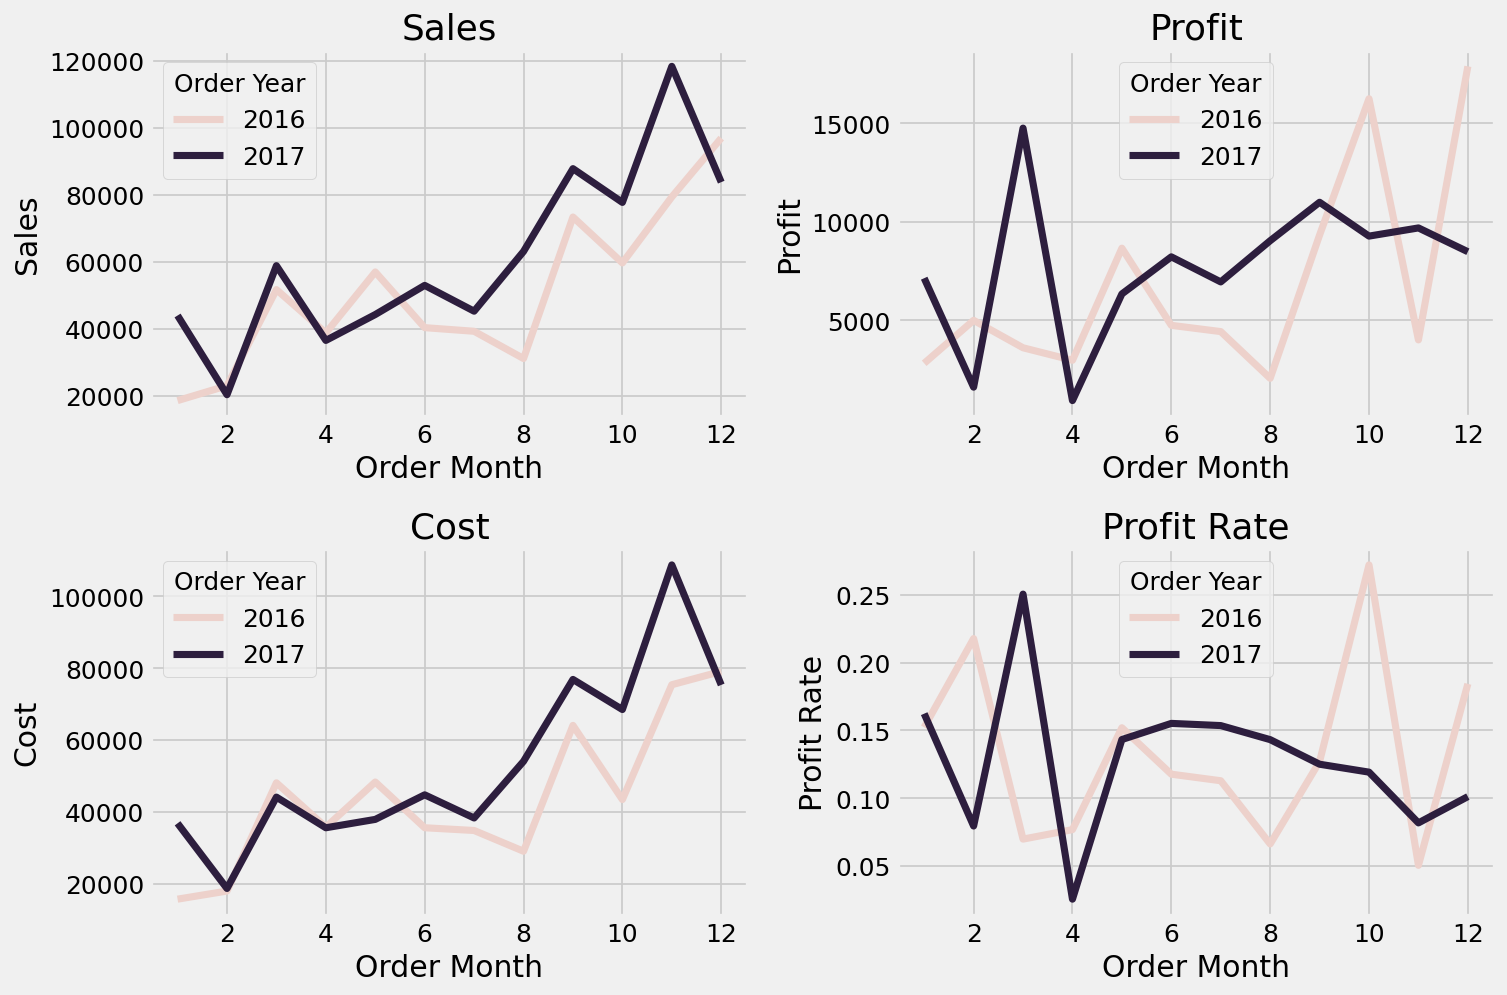

In [11]:
df_month_1617 = df[df["Order Year"].isin([2016,2017])].groupby(["Order Year","Order Month"]).agg({"Sales":"sum","Profit":"sum","Cost":"sum"})
df_month_1617["Profit Rate"]=df_month_1617["Profit"]/df_month_1617["Sales"]
df_month_1617.reset_index(inplace=True)

fig,ax=plt.subplots(dpi=128, figsize=(12,8))
for i,col in enumerate(["Sales","Profit","Cost","Profit Rate"],1):
    plt.subplot(2,2,i)
    sns.lineplot(x="Order Month", y=col, hue="Order Year", data=df_month_1617)
    plt.title(col)
plt.tight_layout()
plt.show()

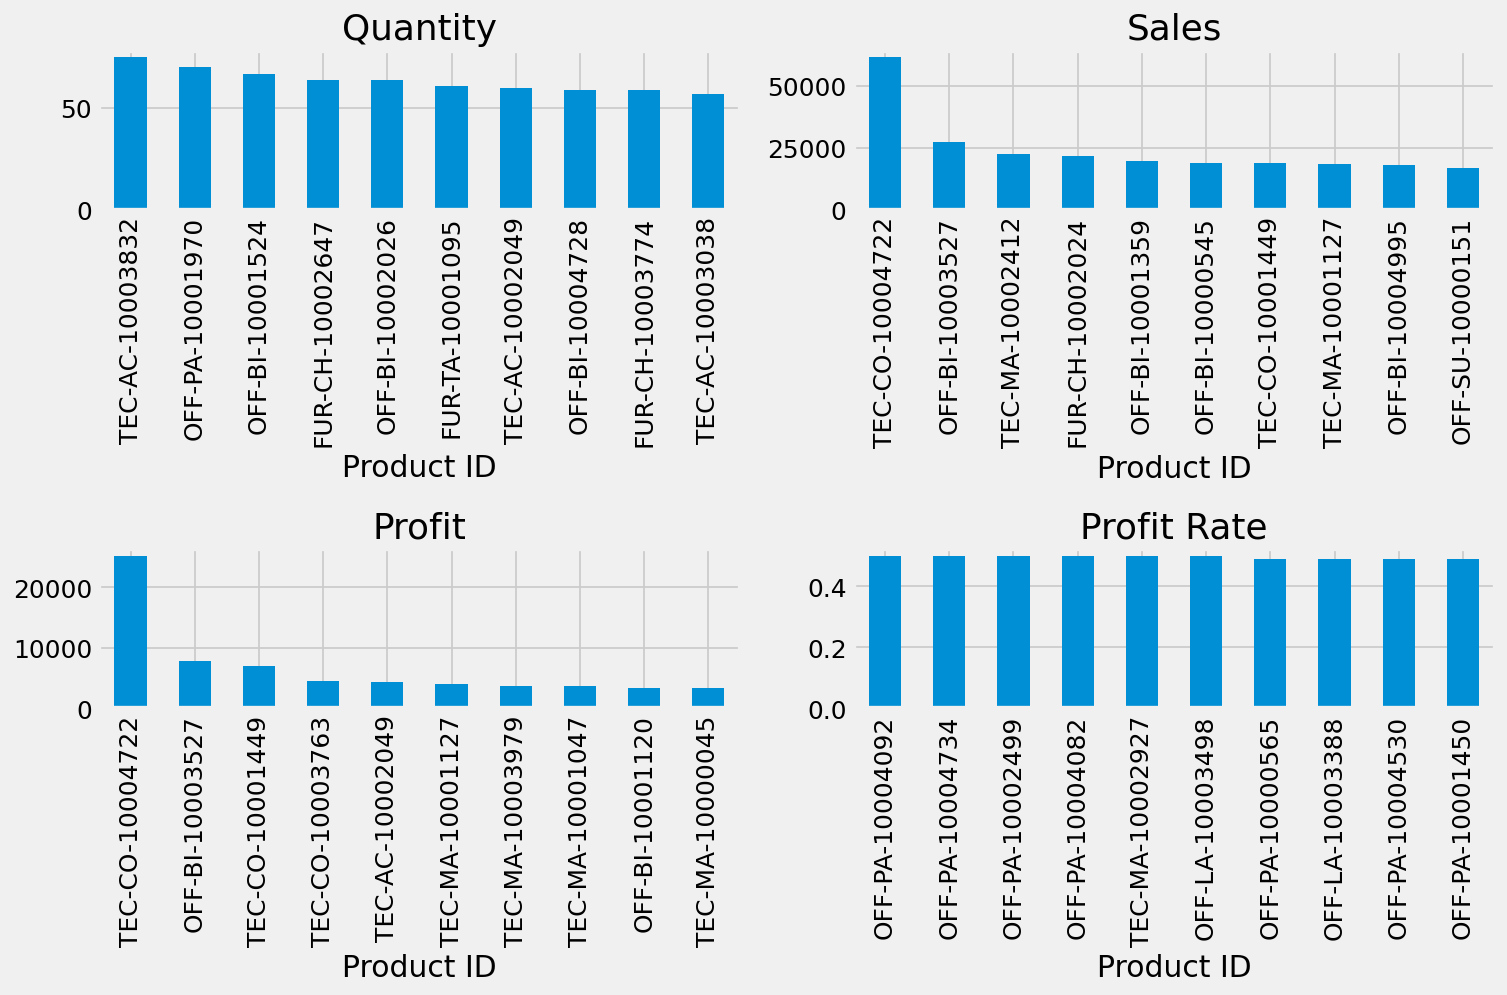

In [12]:
df_product = df.groupby("Product ID").agg({"Sales":"sum","Profit":"sum","Cost":"sum","Quantity":"sum"})
df_product["Profit Rate"]=df_product["Profit"]/df_product["Sales"]

fig,ax = plt.subplots(dpi=128, figsize=(12,8))
for i, col in enumerate(["Quantity","Sales","Profit","Profit Rate"],1):
    plt.subplot(2,2,i)
    df_product[col].sort_values(ascending = False)[0:10].plot(kind="bar")
    plt.title(col)
plt.tight_layout()
plt.show()

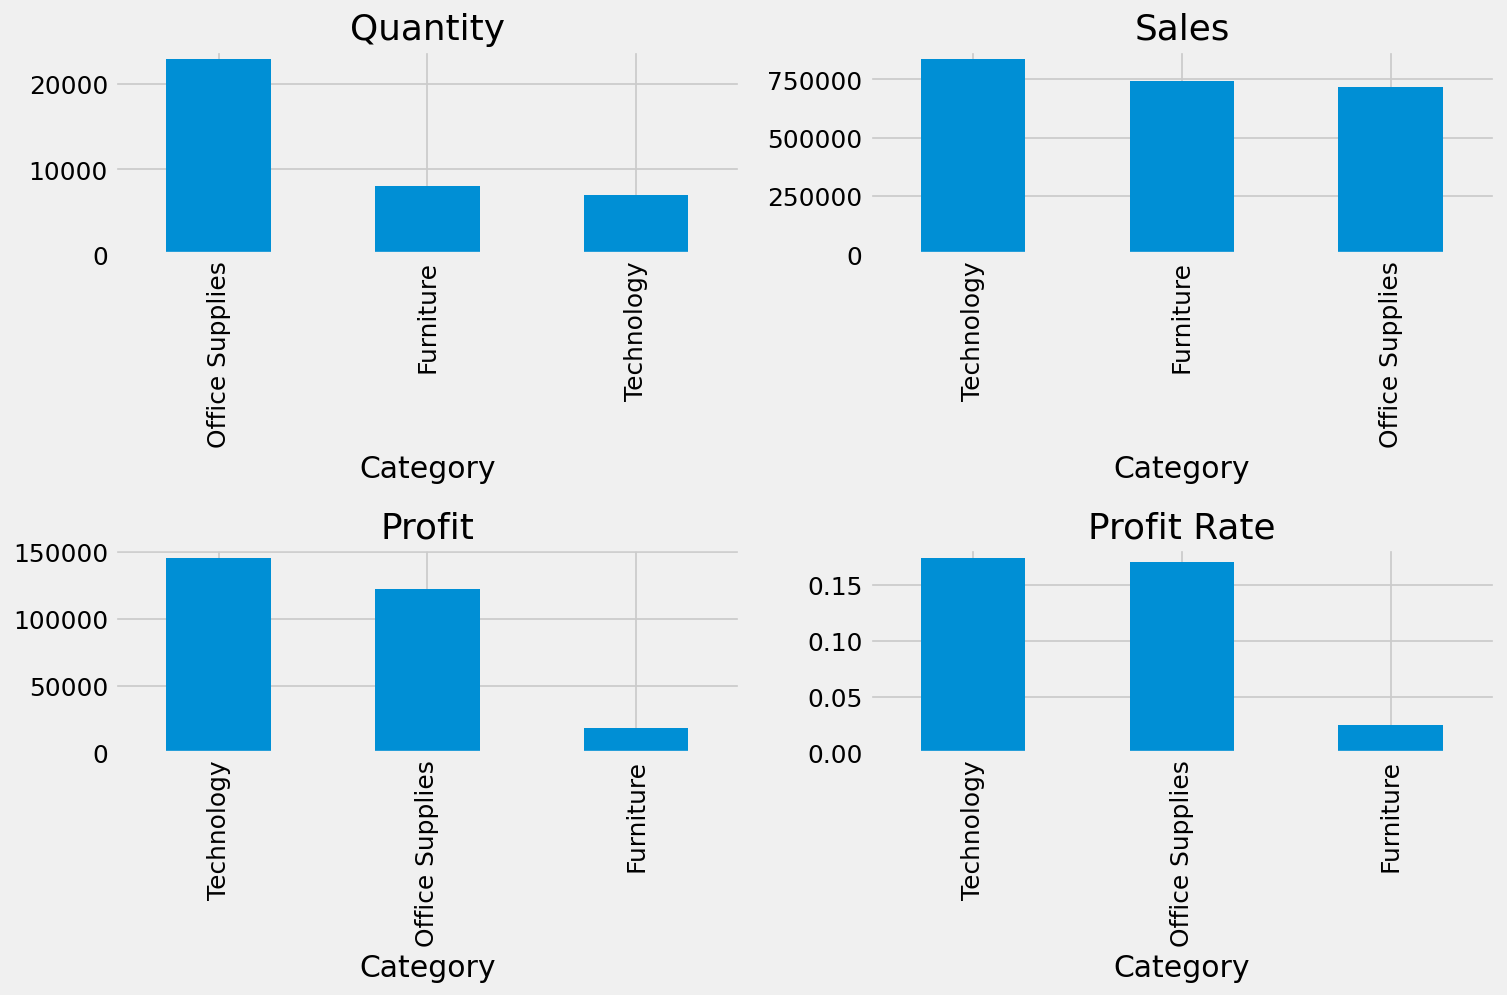

In [13]:
df_category = df.groupby("Category").agg({"Sales":"sum","Profit":"sum","Quantity":"sum"})
df_category["Profit Rate"]=df_category["Profit"]/df_category["Sales"]

fig,ax = plt.subplots(dpi=128, figsize=(12,8))
for i, col in enumerate(["Quantity","Sales","Profit","Profit Rate"],1):
    plt.subplot(2,2,i)
    df_category[col].sort_values(ascending = False)[0:10].plot(kind="bar")
    plt.title(col)
plt.tight_layout()
plt.show()

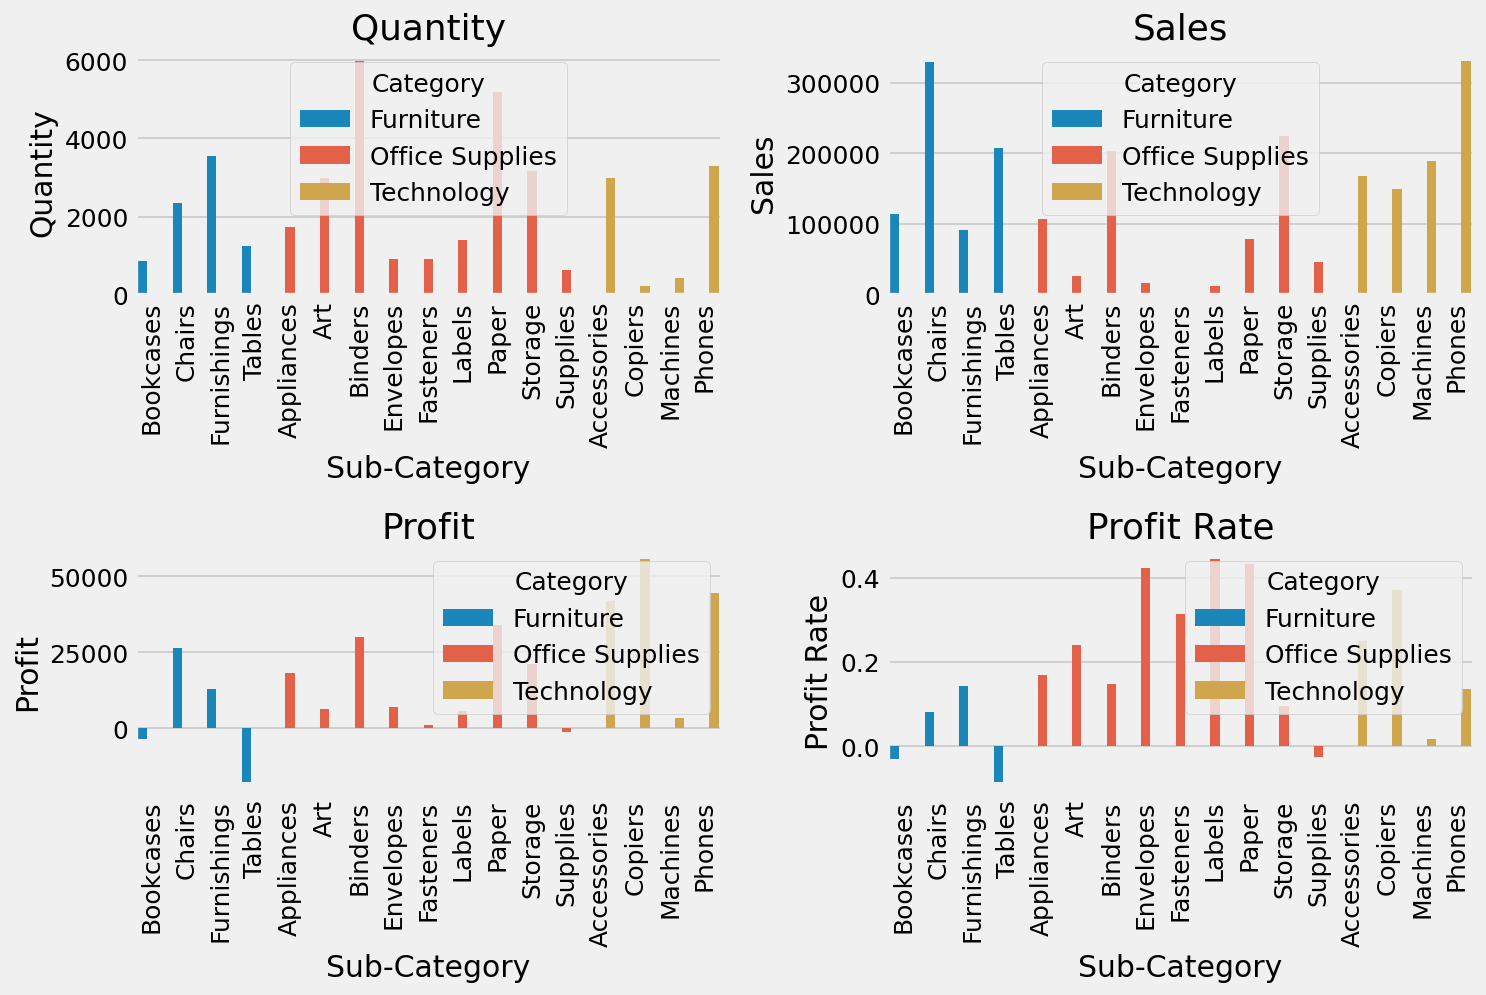

In [15]:
df_subcategory = df.groupby(["Category","Sub-Category"]).agg({"Sales":"sum","Quantity":"sum","Profit":"sum"})
df_subcategory["Profit Rate"] = df_subcategory["Profit"]/df_subcategory["Sales"]
df_subcategory = df_subcategory.reset_index()
df_subcategory["Sub-Category"] = df_subcategory["Sub-Category"].str.replace("-"," ")# This replace is done to look same

fig,ax = plt.subplots(dpi=128, figsize=(12,8))
for i, col in enumerate(["Quantity","Sales","Profit","Profit Rate"],1):
    plt.subplot(2,2,i)
    sns.barplot(x="Sub-Category", y=col, hue="Category", data=df_subcategory)
    plt.title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
df_RFM = df.groupby("Customer Name").agg({"Order Date": lambda x:(df["Order Date"].max()-x.max()).days,
                                         "Order ID":"nunique",
                                         "Sales":"sum",
                                         "Profit":"sum"})
df_RFM.rename(columns={"Order Date":"Recency","Order ID":"Frequency","Sales":"Monetary"},inplace=True)
DiffYears = df.groupby("Customer Name").agg({"Order Date": lambda x: x.dt.year.max()-x.dt.year.min()+1}).rename(columns={"Order Date":"DiffYears"}).DiffYears
df_RFM["Frequency"] = df_RFM["Frequency"]/DiffYears
df_RFM.head()

,Recency,Frequency,Monetary,Profit
Customer Name,,,,
Aaron Bergman,415,1.000000,886.156,129.3465
Aaron Hawkins,12,1.750000,1744.700,365.2152
Aaron Smayling,88,1.750000,3050.692,-253.5746
Adam Bellavance,54,2.666667,7755.620,2054.5885
Adam Hart,34,2.500000,3250.337,281.1890


In [25]:
r_med = df_RFM["Recency"].median()
f_med = df_RFM["Frequency"].median()
m_med = df_RFM["Monetary"].median()

def customer_type_func(frame):
    customer_type_list = []
    for i in range (len(frame)):
        if frame.iloc[i,0]<=r_med and frame.iloc[i,1]>=f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append("Important Value")
        elif frame.iloc[i,0]<=r_med and frame.iloc[i,1]<f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append("Important Development")
        elif frame.iloc[i,0]>r_med and frame.iloc[i,1]>=f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append("Important Retention")
        elif frame.iloc[i,0]>r_med and frame.iloc[i,1]<f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append("Important Recovery")
        else:
            customer_type_list.append("Regular")
    frame["customer_type"] = customer_type_list
customer_type_func(df_RFM)

In [26]:
df_RFM

,Recency,Frequency,Monetary,Profit,customer_type
Customer Name,,,,,
Aaron Bergman,415,1.000000,886.156,129.3465,Regular
Aaron Hawkins,12,1.750000,1744.700,365.2152,Regular
Aaron Smayling,88,1.750000,3050.692,-253.5746,Important Retention
Adam Bellavance,54,2.666667,7755.620,2054.5885,Important Value
Adam Hart,34,2.500000,3250.337,281.1890,Important Value
...,...,...,...,...,...
Xylona Preis,43,2.750000,2374.658,621.2300,Important Value
Yana Sorensen,9,2.666667,6720.444,1778.2923,Important Value
Yoseph Carroll,4,1.250000,5454.350,1305.6290,Important Development


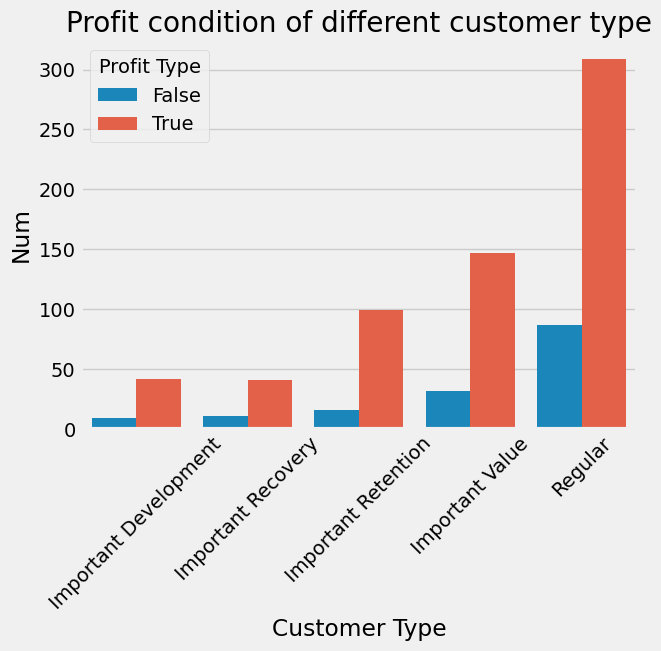

In [27]:
df_RFM["Profit Type"] = (df_RFM.Profit>0)
df_ProfitCust=df_RFM.groupby(["customer_type","Profit Type"]).size().reset_index(name="ProfitCustNum")

sns.barplot(x="customer_type", y="ProfitCustNum", hue="Profit Type", data=df_ProfitCust)
plt.title("Profit condition of different customer type")
plt.xlabel("Customer Type")
plt.ylabel("Num")
plt.xticks(rotation=45)
plt.show()

In [28]:
df_ProfitCust["profit_cust_sum"] = df_ProfitCust.groupby("customer_type")["ProfitCustNum"].transform(sum)
df_ProfitCust["profit_cust_rate"] = df_ProfitCust["ProfitCustNum"]/df_ProfitCust["profit_cust_sum"]
df_ProfitCust[df_ProfitCust["Profit Type"]==True].sort_values(by="profit_cust_rate",ascending=False)

,customer_type,Profit Type,ProfitCustNum,profit_cust_sum,profit_cust_rate
5,Important Retention,True,99,115,0.860870
1,Important Development,True,42,51,0.823529
7,Important Value,True,147,179,0.821229
3,Important Recovery,True,41,52,0.788462
9,Regular,True,309,396,0.780303


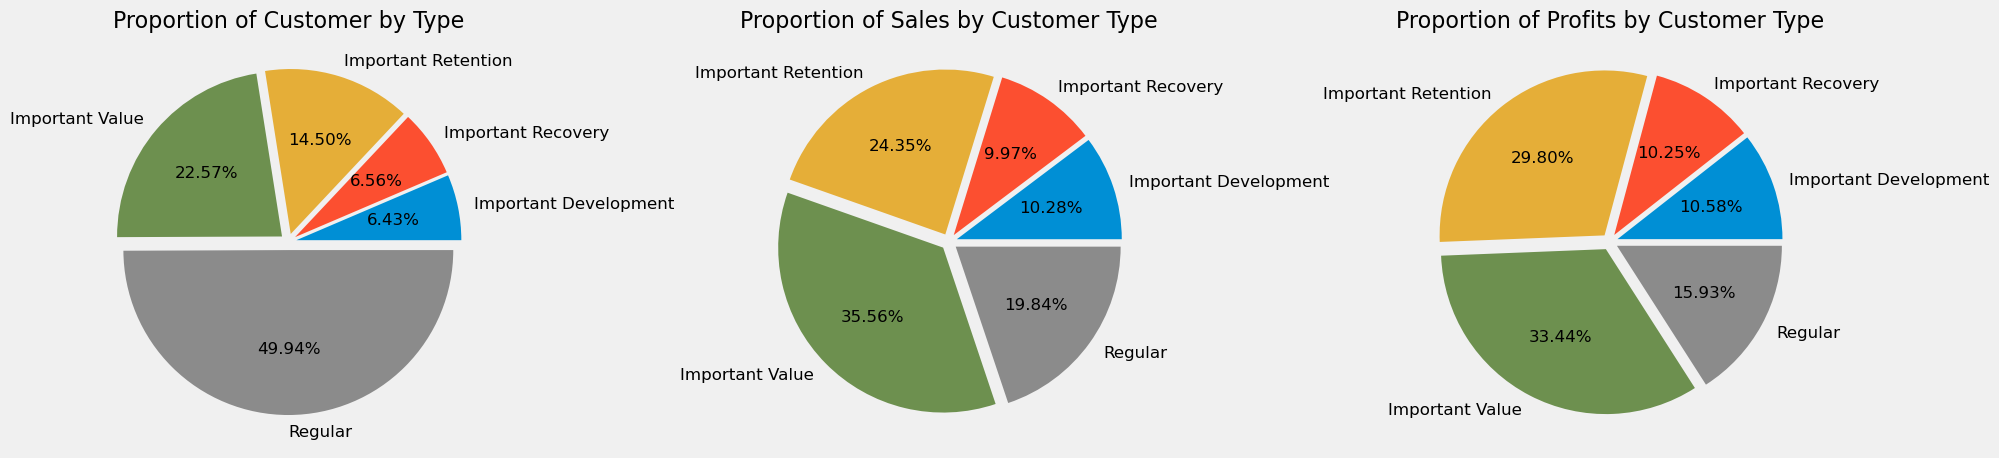

In [31]:
fig, axes = plt.subplots(1,3,figsize=(20,15), dpi=100)

labels = df_RFM.groupby("customer_type").customer_type.size().index
sizes = df_RFM.groupby("customer_type").customer_type.size()

explode = [0.05]*len(labels)
axes[0].pie(sizes, explode=explode, labels=labels, textprops={"fontsize":12}, shadow=False, autopct="%.2f%%")
axes[0].set_title("Proportion of Customer by Type", fontsize=16)

sales_sum = df_RFM.groupby("customer_type")["Monetary"].sum()
axes[1].pie(sales_sum, explode=explode, labels=labels, textprops={"fontsize":12}, shadow=False, autopct="%.2f%%")
axes[1].set_title("Proportion of Sales by Customer Type", fontsize=16)

profit_sum = df_RFM.groupby("customer_type")["Profit"].sum()
axes[2].pie(profit_sum, explode=explode, labels=labels, textprops={"fontsize":12}, shadow=False, autopct="%.2f%%")
axes[2].set_title("Proportion of Profits by Customer Type", fontsize=16)

plt.tight_layout()
plt.show()

In [32]:
df1 = df.drop_duplicates(subset=["Order ID"], keep="first")
pivoted_counts = df1.pivot_table(index="Customer Name", columns="Order Year Month", values="Order Date", aggfunc="count").fillna(0)
pivoted_counts.head()

Order Year Month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Customer Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Hawkins,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Aaron Smayling,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Adam Bellavance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
Adam Hart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [33]:
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

Order Year Month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Customer Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Aaron Hawkins,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Aaron Smayling,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0
Adam Bellavance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
Adam Hart,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0


In [37]:
def active_status(data):
    status = []
    for i in range(48):
        if data[i]==0:
            if len(status)==0:
                status.append("unreg")
            else:
                if status[i-1]=="unreg":
                    status.append("unreg")
                else:
                    status.append("unactive")
        else:
            if len(status)==0:
                status.append("new")
            else:
                if status[i-1]=="unactive":
                    status.append("return")
                elif status[i-1]=="unreg":
                    status.append("new")
                else:
                    status.append("active")
    return pd.Series(status, df_purchase.columns)

In [38]:
purchase_states = df_purchase.apply(active_status,axis=1)
purchase_states.head()

Order Year Month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Customer Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Aaron Hawkins,unreg,unreg,unreg,new,active,unactive,unactive,unactive,unactive,return,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return
Aaron Smayling,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,return,active,active,unactive,unactive
Adam Bellavance,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,return,unactive
Adam Hart,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,return,unactive,unactive,return,unactive,unactive,unactive,return,active,unactive,unactive,unactive,return,active,active,unactive


In [39]:
purchase_states_ct = purchase_states.replace("unreg",np.NaN).apply(lambda x:pd.value_counts(x))
purchase_states_ct.head()

Order Year Month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
active,NaN,3.0,4.0,4,6,5,4,7,10,14,9,25,6,2,2,6,6,4,5,4,10,12,14,30,11,1,3,9,10,10,8,14,19.0,18,19,33,12.0,3.0,6,14,23.0,14,14,13.0,29,29,32,54.0
new,32.0,24.0,65.0,56,56,48,44,49,68,42,62,49,7,7,18,12,12,12,8,12,16,9,10,13,6,2,6,7,7,8,2,4,NaN,1,6,2,NaN,NaN,3,1,NaN,1,2,NaN,1,2,1,NaN
return,NaN,NaN,NaN,4,5,10,17,14,40,19,68,60,15,27,57,51,51,52,51,48,100,58,122,98,29,39,71,67,79,72,79,68,157.0,76,140,122,55.0,50.0,106,94,90.0,103,86,91.0,166,105,183,141.0
unactive,NaN,29.0,52.0,113,166,218,260,304,324,409,407,461,574,573,550,570,582,595,607,619,573,629,572,590,691,697,665,669,663,677,680,687,597.0,679,615,625,715.0,729.0,670,677,673.0,669,687,685.0,594,656,577,598.0


In [40]:
purchase_states_ct.T.fillna(0)

,active,new,return,unactive
Order Year Month,,,,
2014-01,0.0,32.0,0.0,0.0
2014-02,3.0,24.0,0.0,29.0
2014-03,4.0,65.0,0.0,52.0
2014-04,4.0,56.0,4.0,113.0
2014-05,6.0,56.0,5.0,166.0
2014-06,5.0,48.0,10.0,218.0
2014-07,4.0,44.0,17.0,260.0
2014-08,7.0,49.0,14.0,304.0
2014-09,10.0,68.0,40.0,324.0


<Axes: xlabel='Order Year Month'>

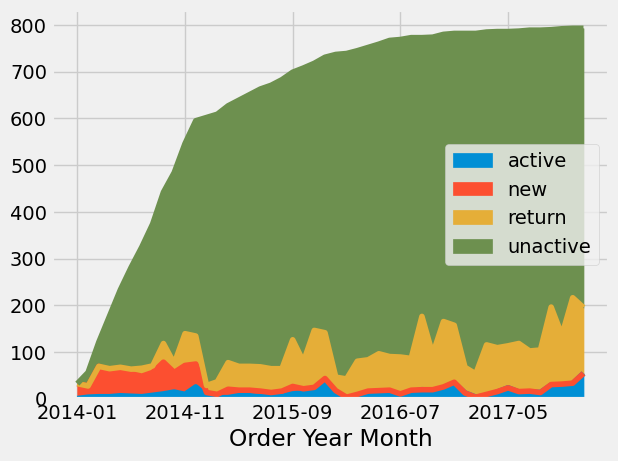

In [41]:
purchase_states_ct.T.fillna(0).plot.area()

Text(0.5, 1.0, 'Return Rate and Active Rate')

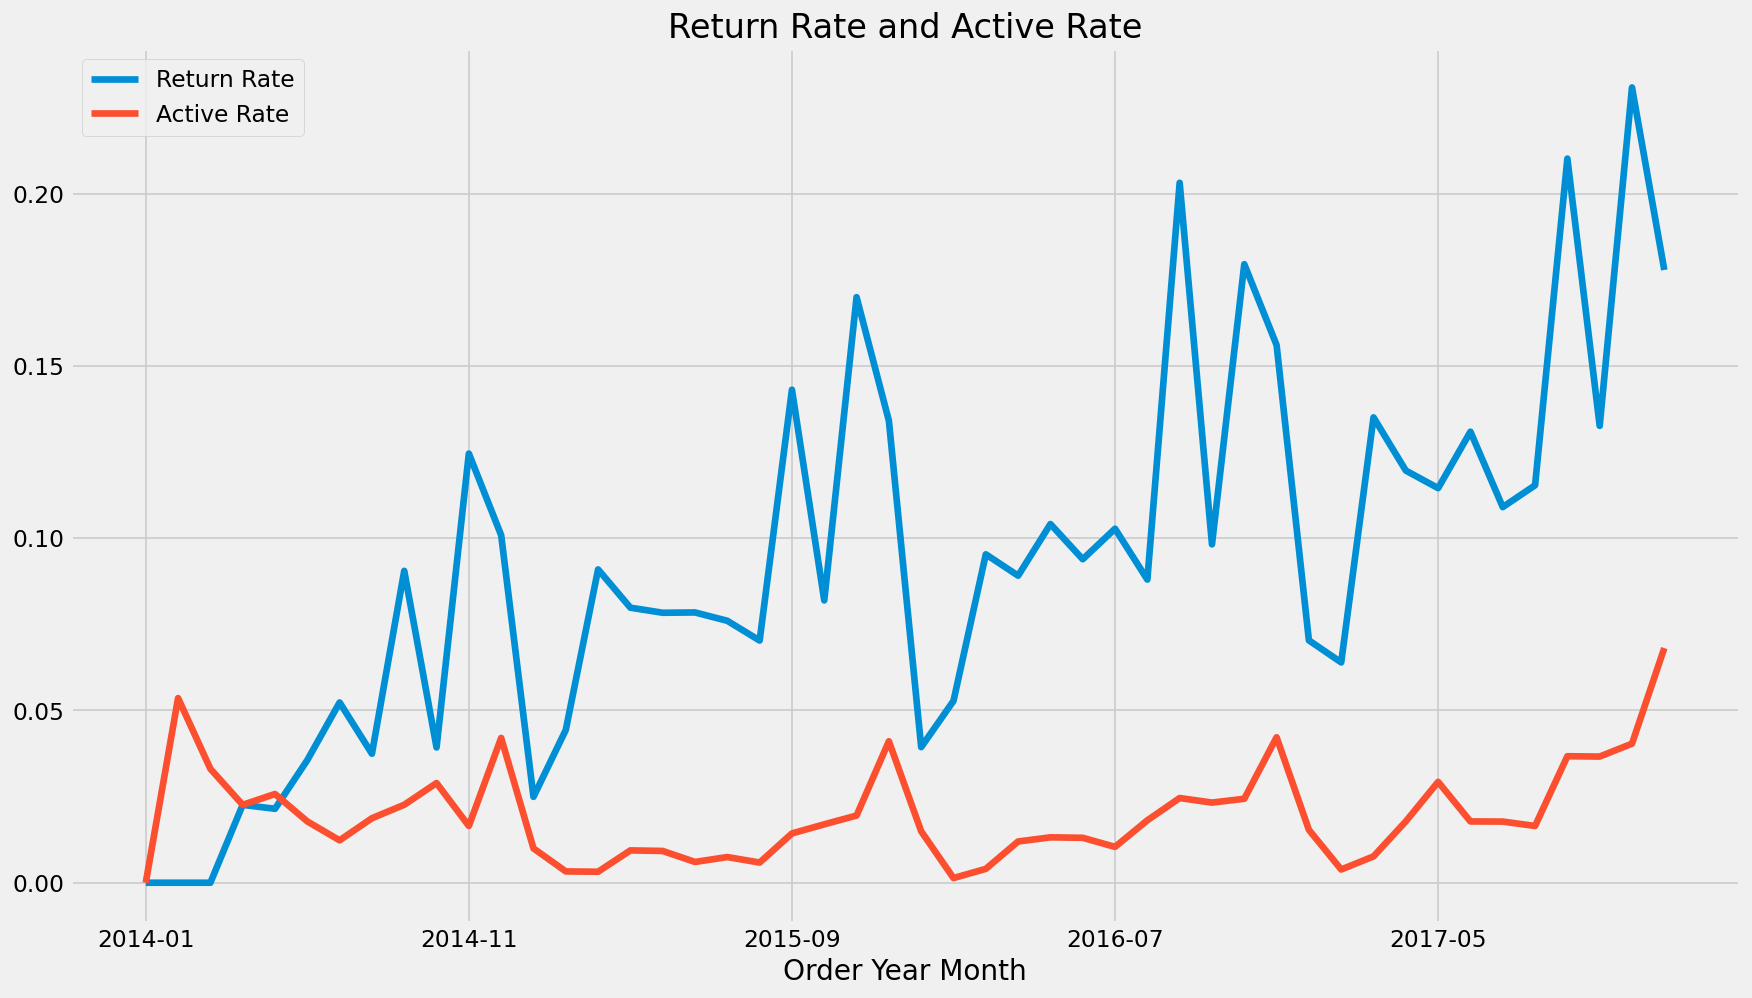

In [42]:
plt.figure(figsize=(16,9),dpi=120)
rate=purchase_states_ct.T.fillna(0).apply(lambda x:x/x.sum(),axis=1)
rate["return"].plot(label = "Return Rate")
rate["active"].plot(label = "Active Rate")
plt.legend()
plt.title("Return Rate and Active Rate")

In [43]:
order_diff = df1.groupby(by="Customer Name").apply(lambda x:abs(x["Order Date"]-x["Order Date"].shift()).dt.days)
order_diff.head()

Customer Name      
Aaron Bergman  4961      NaN
               8222     17.0
               8801    996.0
Aaron Hawkins  3199      NaN
               3311    638.0
Name: Order Date, dtype: float64

In [44]:
order_diff.describe()

count    4216.000000
mean      478.191414
std       346.965438
min         0.000000
25%       178.000000
50%       411.000000
75%       726.000000
max      1422.000000
Name: Order Date, dtype: float64

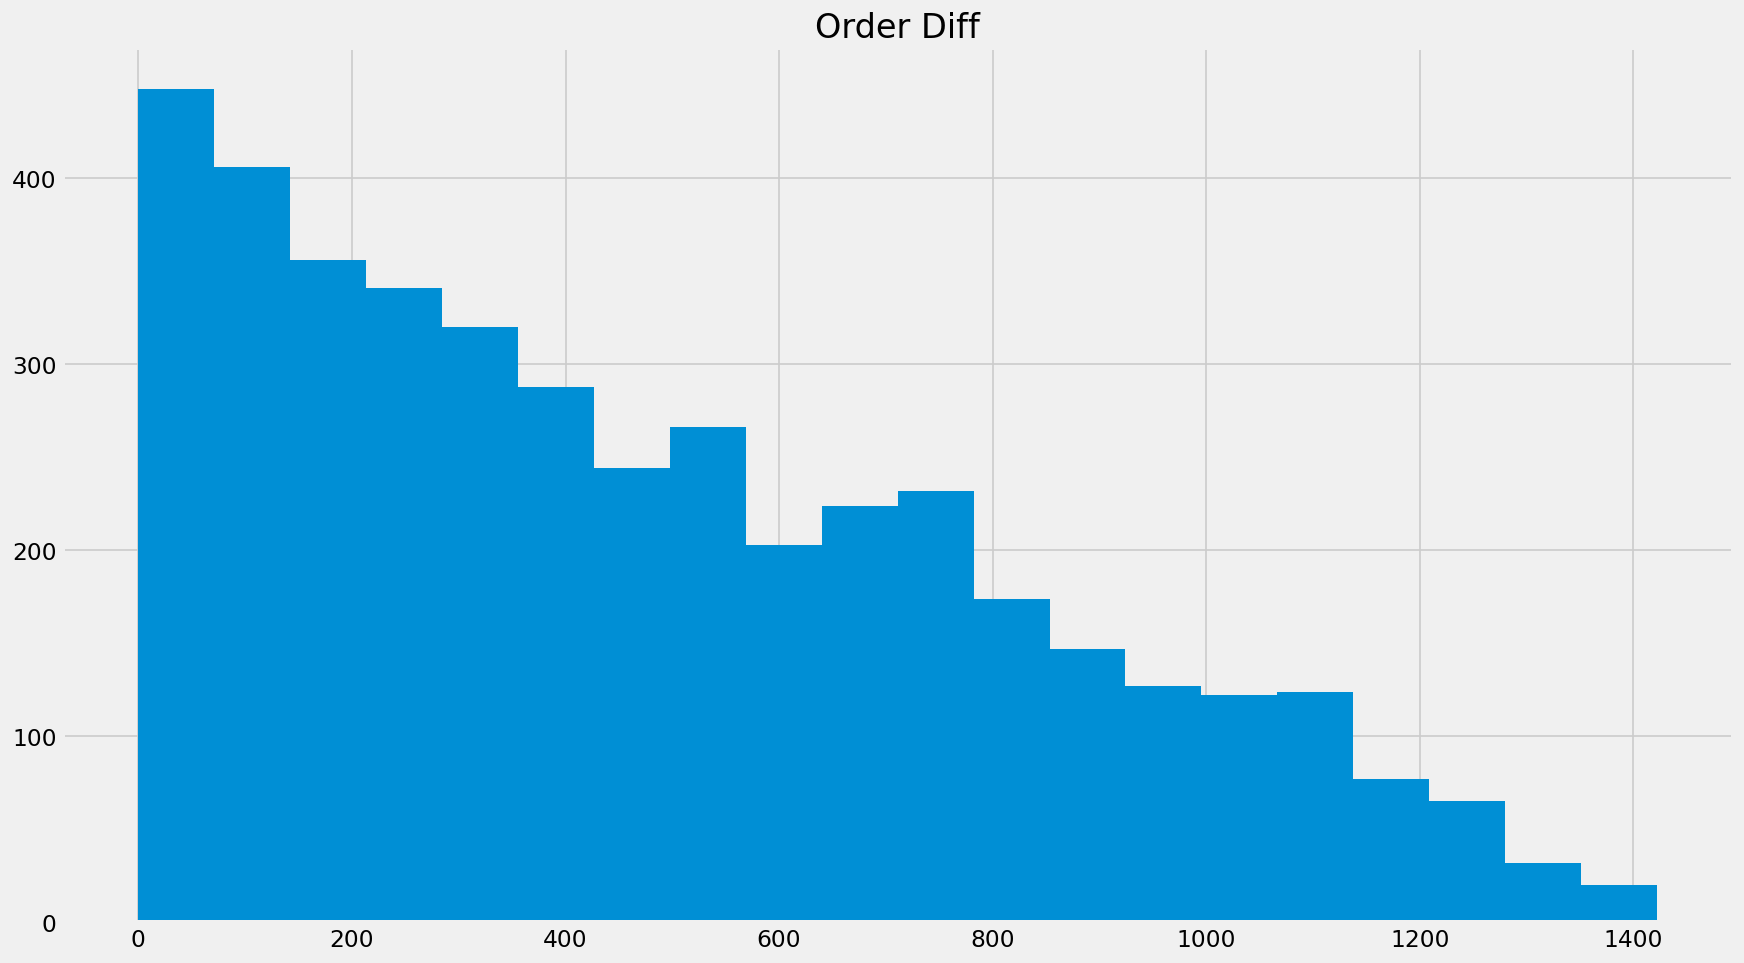

In [45]:
plt.figure(figsize=(16,9),dpi=120)
plt.hist(order_diff.dropna(),bins=20)
plt.title("Order Diff")
plt.show()

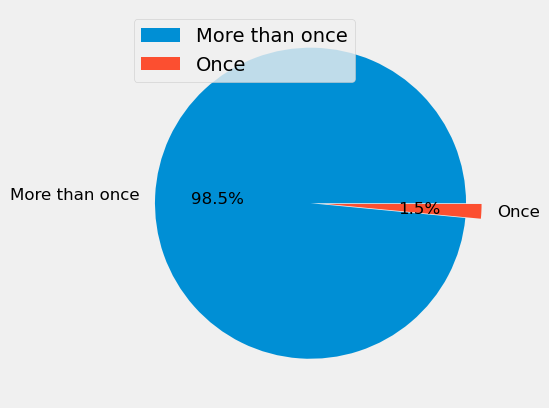

array([781,  12], dtype=int64)

In [49]:
user_life=df1.groupby(by="Customer Name")["Order Date"].agg(["min","max"])
user_life["life_time"]=(user_life["max"]-user_life["min"]).dt.days
user_life_count = (user_life["max"]==user_life["min"]).value_counts()
labels = ["More than once","Once"]
sizes = user_life_count.values
explode = [0.05]*len(labels)

fig,ax=plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, textprops={"fontsize":12}, shadow=False, autopct="%1.1f%%")
ax.legend(labels, loc="upper left")
plt.show()
sizes

In [50]:
user_life["life_time"].describe()

count     793.000000
mean      999.650694
std       309.869711
min         0.000000
25%       829.000000
50%      1092.000000
75%      1222.000000
max      1440.000000
Name: life_time, dtype: float64

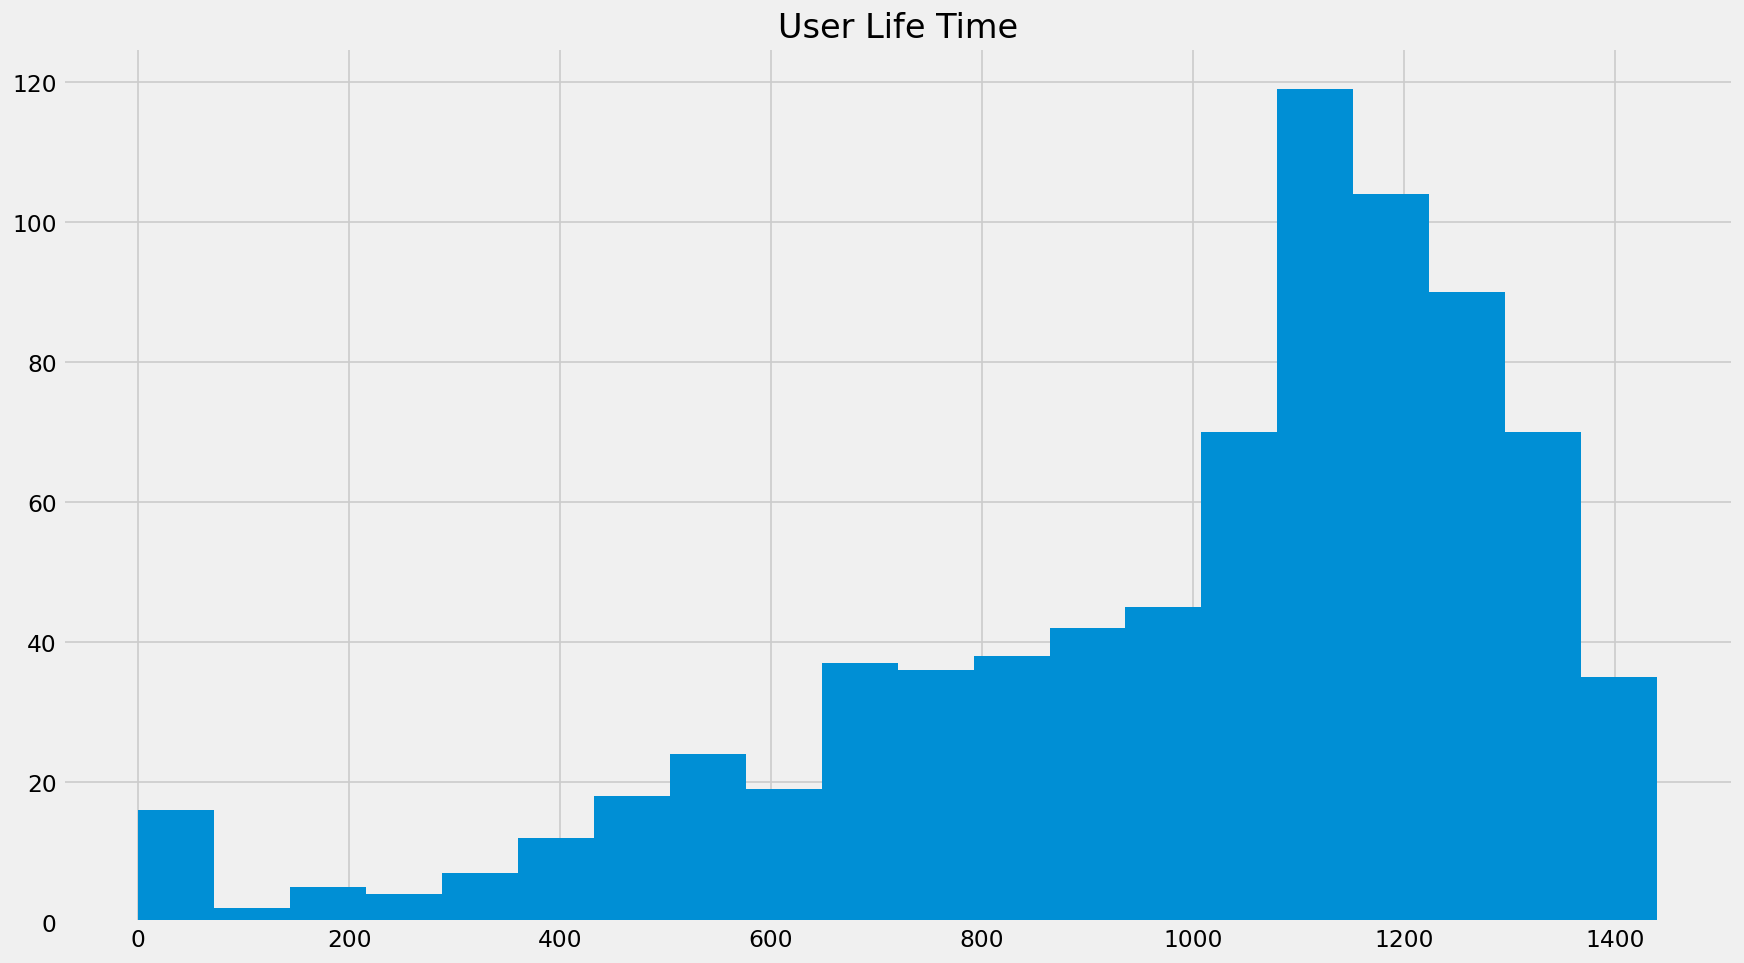

In [51]:
plt.figure(figsize=(16,9),dpi=120)
plt.hist(user_life["life_time"],bins=20)
plt.title("User Life Time")
plt.show()

Text(0.5, 1.0, 'Repurchase Rate')

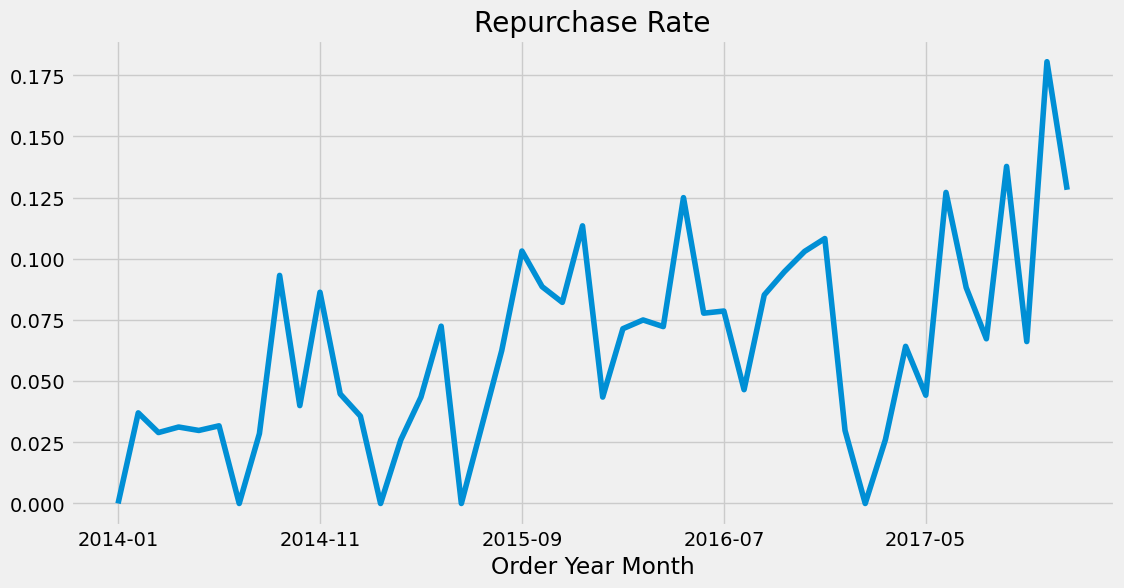

In [52]:
purchase_r = pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
purchase_r.head()

(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6))
plt.title("Repurchase Rate")

In [57]:
def purchase_back(data):
    status = []
    for i in range(47):
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            elif data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status, df_purchase.columns)

In [58]:
purchase_b = df_purchase.apply(purchase_back,axis=1)
purchase_b.head()

Order Year Month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Customer Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Hawkins,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Smayling,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN
Adam Bellavance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
Adam Hart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN


Text(0.5, 1.0, 'Repeat Purchase Num and Purchase Num')

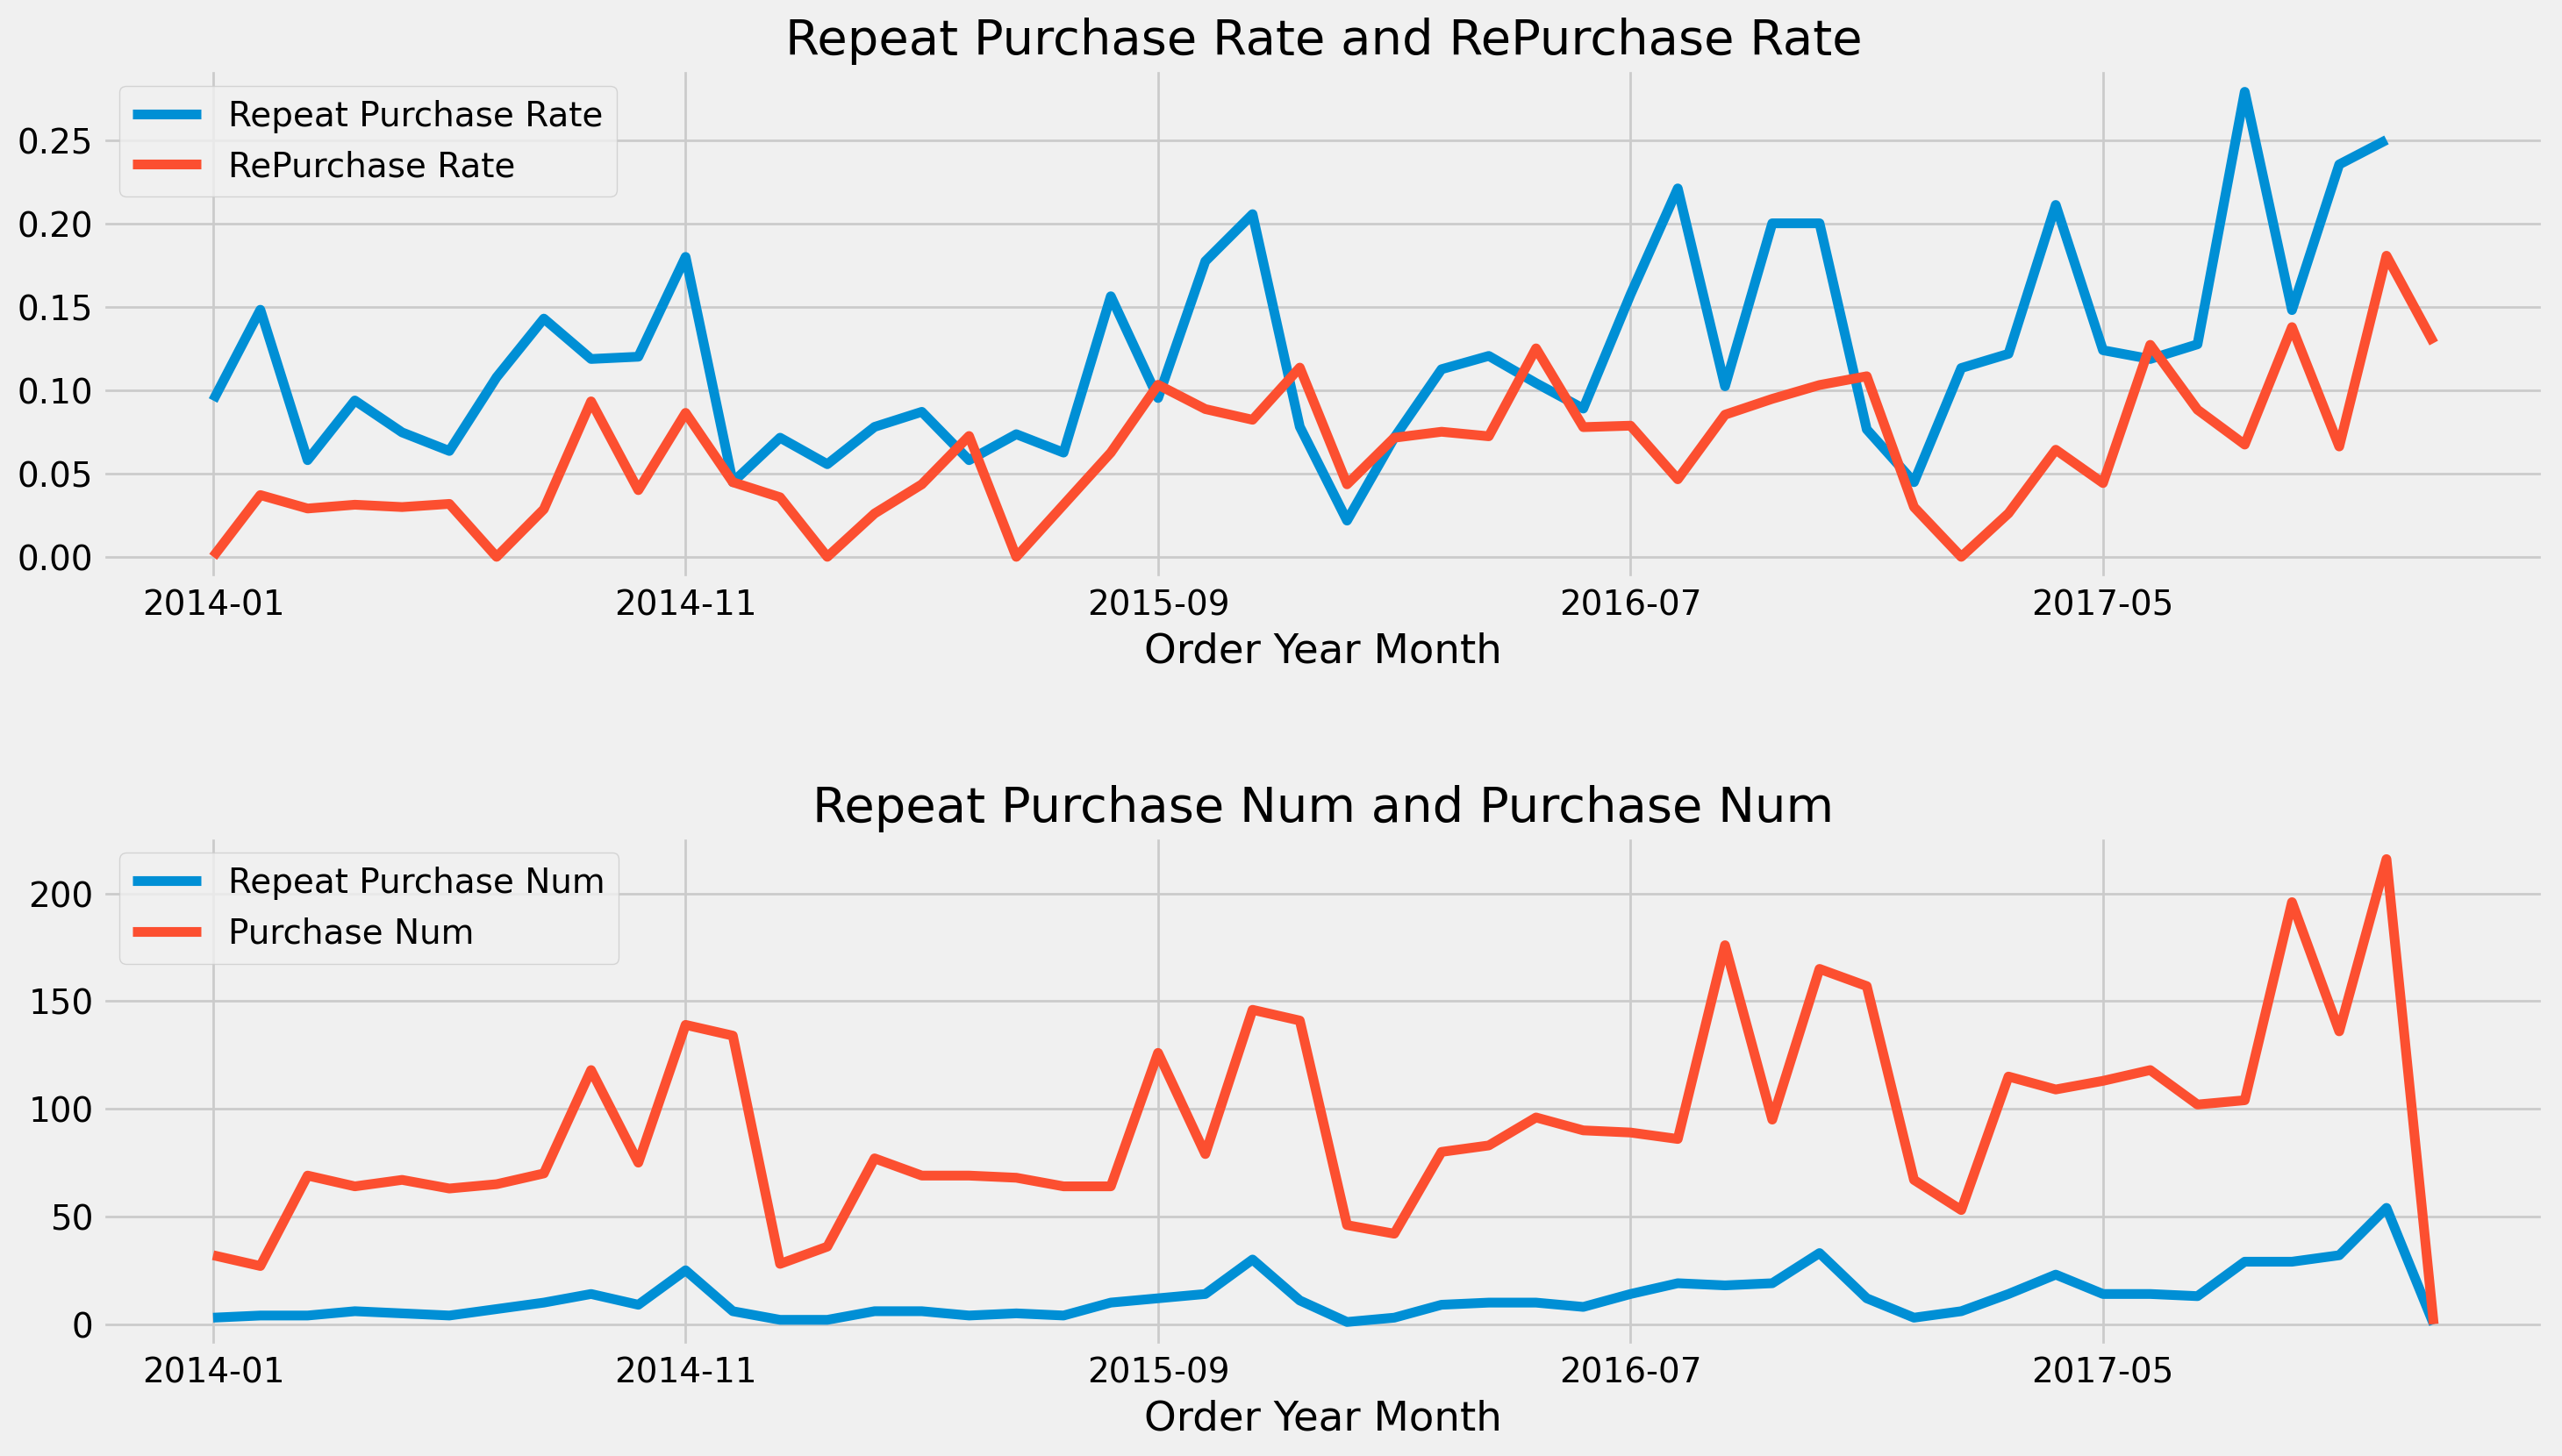

In [59]:
plt.figure(figsize=(16,9),dpi=200)
plt.subplot(211)
(purchase_b.sum()/purchase_b.count()).plot(label="Repeat Purchase Rate")
(purchase_r.sum()/purchase_r.count()).plot(label="RePurchase Rate")
plt.legend()
plt.title("Repeat Purchase Rate and RePurchase Rate")

plt.subplots_adjust(hspace=0.5)

plt.subplot(212)
purchase_b.sum().plot(label="Repeat Purchase Num")
purchase_b.count().plot(label="Purchase Num")
plt.legend()
plt.title("Repeat Purchase Num and Purchase Num")